## Riksantikvarieämbetet RAÄ -  Evighetsrunor 
version 1.3

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20Evighetsrunor.ipynb)
* Phabricator [T268381](https://phabricator.wikimedia.org/T268381)

* get KSAMSÖK data [see API](https://www.raa.se/hitta-information/k-samsok/att-anvanda-k-samsok/metoder/)
  * example [xml](http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=2&query=serviceName=%22srdb%22&startRecord=1)  
  * supported fields?!?! itemDescription,itemLabel,lon,lat
    * missing fields in this data 
      * carver e.g. [Fot 2](https://app.raa.se/open/runor/search_results?key=carver&id=e8c2b0b6-4b1e-4ba4-a163-f5e101802618), [Ärnfast](https://app.raa.se/open/runor/search_results?key=carver&id=0d4390a7-c962-4ba7-af3c-22b7764709e0)
      * material e.g. [granit](https://app.raa.se/open/runor/search_results?key=material&id=fa61cddc-97a8-4dd8-9333-e4f359c090da), [rödgnejsgranit](https://app.raa.se/open/runor/search_results?key=material&id=bee1a5c1-6ead-4a15-8c8d-740e7159a970), [sten](https://app.raa.se/open/runor/search_results?key=material&id=56f871f0-71e2-4e70-a2a6-530f63bb64ab)
      * dating e.g. [Viking age](https://app.raa.se/open/runor/search_results?key=period&id=81fd003d-ee5a-407e-ac0e-aa8fbf6cf91c)
      * style e.g. [rak](https://app.raa.se/open/runor/search_results?key=style&id=d2b973c6-1eb1-4201-9bf9-a951c63deb70)
      * translation en-gb, sv [Översättning P]()

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-09 14:07:20.809288


In [2]:
# get all records UGC just sends 200 records --> we need to loop and I guess max3000000 records
import urllib3, json
import pandas as pd  
import pprint
http = urllib3.PoolManager()
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=50&x-api=%22test%22&query=%22*%22&FORMAT=JSON&startRecord="
urlbase = "http://kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=10&x-api=%22test%22&query=serviceName=%22srdb%22&startRecord="
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemDescription,itemLabel,lon,lat&startRecord="
#urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&query=serviceName=%22srdb%22&fields=itemLabel,lon,lat,url"
urlbase = "http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
pp = pprint.PrettyPrinter(indent=1)
dftot = pd.DataFrame(columns=['itemId', 'itemLabel', 'lon' ,'lat','url', 'parishName'])

#for i in range(1,5,5):
for i in range(1,8000,500):
    url = urlbase + str(i)
    print (i, url)
    r = http.request('GET', url,headers={"Accept" : 'application/json'})
    data = json.loads(r.data)
#    pp.pprint(data)
    i = 0 
    if len(data["result"]["records"]) > 0:
        for r in data["result"]["records"]["record"]:
            for f in r["field"]:
                #itemId itemLabel lon lat url parishName
                if f["name"] in 'itemId':
                   itemId =  f["content"]
                if f["name"] in 'itemLabel':
                   itemLabel =  f["content"]
                if f["name"] in 'lon':
                   lon =  f["content"]
                if f["name"] in 'lat':
                   lat =  f["content"]
                if f["name"] in 'url':
                   url =  f["content"]
                if f["name"] in 'parishName':
                   parishName =  f["content"]

            dftot = dftot.append({'itemId': itemId, 'itemLabel': itemLabel, 'lon': lon, 
                   'lat': lat, 'url': url, 'parishName' : parishName }, ignore_index=True)



1 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1
501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=501
1001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1001
1501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=1501
2001 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSchema=xml&fields=itemLabel,lon,lat,url,parishName&startRecord=2001
2501 http://www.kulturarvsdata.se/ksamsok/api?method=search&hitsPerPage=500&query=serviceName=%22srdb%22&recordSc

In [3]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   itemId      7189 non-null   object 
 1   itemLabel   7189 non-null   object 
 2   lon         7189 non-null   float64
 3   lat         7189 non-null   float64
 4   url         7189 non-null   object 
 5   parishName  7189 non-null   object 
dtypes: float64(2), object(4)
memory usage: 337.1+ KB
None


In [4]:
dftot["kulturarvsdata"] =  dftot["itemId"].astype(str).str.replace("http://kulturarvsdata.se","")

dftot

,itemId,itemLabel,lon,lat,url,parishName,kulturarvsdata
0,http://kulturarvsdata.se/uu/srdb/2512da5a-8c0c...,"Öl Köping29, Köpings kyrka",16.71840,56.8781,https://app.raa.se/open/runor/inscription?id=2...,Köpings socken,/uu/srdb/2512da5a-8c0c-4122-b46c-834a8f9ee3a2
1,http://kulturarvsdata.se/uu/srdb/0ad9a81c-15b5...,"U 283, Torsåker (Tjursåker)",17.93190,59.5551,https://app.raa.se/open/runor/inscription?id=d...,Hammarby socken,/uu/srdb/0ad9a81c-15b5-4b38-bf4c-292e8ce7c824
2,http://kulturarvsdata.se/uu/srdb/0ae15e3f-6005...,"N 518, Værnes kirke",10.95490,63.4543,https://app.raa.se/open/runor/inscription?id=2...,Værnes sogn,/uu/srdb/0ae15e3f-6005-485d-8f7a-0122ceda2f08
3,http://kulturarvsdata.se/uu/srdb/0aeba88b-42a8...,"N 124, Ål kirke",8.55757,60.6288,https://app.raa.se/open/runor/inscription?id=2...,Ål sogn,/uu/srdb/0aeba88b-42a8-4088-b3a9-dda45ed98555
4,http://kulturarvsdata.se/uu/srdb/0d166a6c-476e...,"N A85, Kaupanger kirke",7.23340,61.1842,https://app.raa.se/open/runor/inscription?id=4...,Kaupanger sogn,/uu/srdb/0d166a6c-476e-4ba4-a0cd-434873d2484c
...,...,...,...,...,...,...,...
7184,http://kulturarvsdata.se/uu/srdb/fda1ef7f-c940...,"DR 129, Durup",9.63083,56.7035,https://app.raa.se/open/runor/inscription?id=2...,Durup sogn,/uu/srdb/fda1ef7f-c940-4e77-ac5b-60f8192b4a33
7185,http://kulturarvsdata.se/uu/srdb/fda7958c-cb57...,"N B501, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=d...,Bergen,/uu/srdb/fda7958c-cb57-4e33-8524-7a1a20545b55
7186,http://kulturarvsdata.se/uu/srdb/fde7a05b-ce80...,"N 661, Gullskoen, Bryggen, Bergen",5.32341,60.3974,https://app.raa.se/open/runor/inscription?id=9...,Bergen,/uu/srdb/fde7a05b-ce80-456b-8eae-8370b539a4a8
7187,http://kulturarvsdata.se/uu/srdb/fecc9ad2-2186...,"U 526, Frötuna kyrka",18.67500,59.7415,https://app.raa.se/open/runor/inscription?id=4...,Frötuna socken,/uu/srdb/fecc9ad2-2186-42a4-9ab5-f8eed687897c


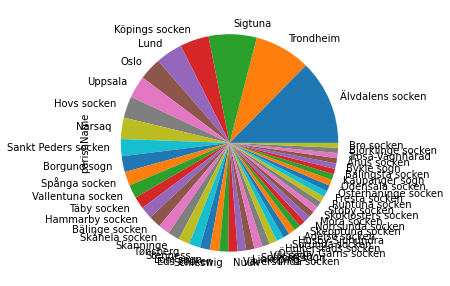

In [5]:
plot = dftot["parishName"].value_counts()[1:50].plot.pie(y='counts', figsize=(5, 5))  

In [6]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-09 14:08:31.165248
Time elapsed (hh:mm:ss.ms) 0:01:10.356580


In [17]:
#can we create a Graph guess we should have more fields

In [18]:
import networkx as nx
G = nx.Graph()

In [21]:
G = nx.from_pandas_edgelist(dftot[1:40], 'itemLabel', 'parishName')

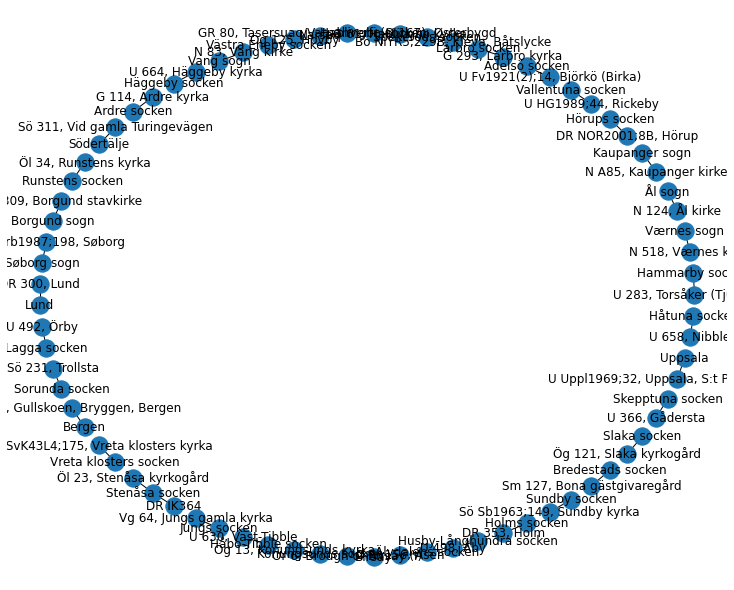

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)